In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans

In [2]:
# Only using the top 15 PCs
pc = np.load('./PCA_top100.npy')
pc = pc[:,0:15]
print(np.shape(pc))

(2504, 15)


In [3]:
#Perform tSNE
tSNE = TSNE(n_components=2).fit_transform(pc)
print(np.shape(tSNE))

(2504, 2)


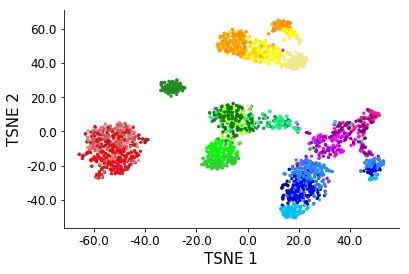

In [5]:
#Plot tSNE data

#Load population labels
sample_to_pop = {}
with open("df_pop.csv", "r") as f:
    for line in f:  
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

pop_to_color = {
    # EAS - yellow & orange
    "CHB": "yellow", "JPT": "khaki", "CHS": "gold", "CDX": "orange", "KHV": "darkorange", 
    # EUR - blue
    "CEU": "blue", "TSI": "dodgerblue", "FIN": "deepskyblue", "GBR": "darkblue", "IBS": "royalblue",
    # AFR - green
    "YRI": "green", "LWK": "forestgreen", "GWD": "limegreen", "MSL": "lime", "ESN": "greenyellow", 
    "ASW": "springgreen", "ACB": "seagreen", 
    # AMR - purple
    "MXL": "purple", "PUR": "darkviolet", "CLM": "magenta", "PEL": "deeppink", 
    # SAS - red
    "GIH": "red", "PJL": "crimson", "BEB": "firebrick", "STU": "lightcoral", "ITU": "indianred", 
    # None
    "None": "lightgrey"  
}

colors = []
sample_names = []
for sample in sample_to_pop.values():
    if len(sample) == 3:
        color = pop_to_color[sample]
        colors.append(color)    
    
tsne1 = tSNE[0:, 0:1].transpose()[0]
tsne2 = tSNE[0:, 1:2].transpose()[0]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tsne1, tsne2, color=colors, s=5)
ax.set_xlabel("TSNE 1", size=15)
ax.set_ylabel("TSNE 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

## KMeans Clustering into 5 Clusters

In [23]:
#Perform kmeans clustering into 5 clusters
km = KMeans(n_clusters=5).fit(tSNE)

In [24]:
group_one = []
group_two = []
group_three = []
group_four = []
group_five = []
group_six = []
for i,c in enumerate(km.labels_):
    if c == 0:
        group_one += [i]
    elif c == 1:
        group_two += [i]
    elif c == 2:
        group_three += [i]
    elif c == 3:
        group_four += [i]
    elif c == 4:
        group_five += [i]
    elif c == 5:
        group_six += [i]
    else:
        print("This should never print")

In [25]:
pop = []
with open("df_pop.csv", "r") as f:
    line += f.readline()
    while line:
        line = f.readline()
        parse = line.strip().split(",")
        if len(parse) == 2:
            pop += [parse[1]]

In [26]:
#split each group up according to the population color to see if it was colored correctly.
#Legend: [EUR, AFR, EAS, AMR, SAS]
#Legend: [blue, green, yellow, purple, red]
blue = ["CEU", "TSI", "FIN", "GBR", "IBS"]
green = ["YRI", "LWK", "GWD", "MSL", "ESN", "ASW", "ACB"]
yellow = ["CHB", "JPT", "CHS", "CDX", "KHV"]
purple = ["MXL", "PUR", "CLM", "PEL"]
red = ["GIH", "PJL", "BEB", "STU", "ITU"]

In [27]:
#group_one
group_one_count = [0, 0, 0, 0, 0]
for i in group_one:
    if pop[i] in blue:
        group_one_count[0] += 1
    elif pop[i] in green:
        group_one_count[1] += 1
    elif pop[i] in yellow:
        group_one_count[2] += 1
    elif pop[i] in purple:
        group_one_count[3] += 1
    elif pop[i] in red:
        group_one_count[4] += 1
    else:
        print(pop[i])

print("Group 1. Legend Index:")
print(group_one_count.index(max(group_one_count)))
print("Accuracy:")
print(max(group_one_count)/float(sum(group_one_count)))

Group 1. Legend Index:
4
Accuracy:
1.0


In [28]:
#group_two
group_two_count = [0, 0, 0, 0, 0]
for i in group_two:
    if pop[i] in blue:
        group_two_count[0] += 1
    elif pop[i] in green:
        group_two_count[1] += 1
    elif pop[i] in yellow:
        group_two_count[2] += 1
    elif pop[i] in purple:
        group_two_count[3] += 1
    elif pop[i] in red:
        group_two_count[4] += 1
    else:
        print(pop[i])

print("Group 2. Legend Index:")
print(group_two_count.index(max(group_two_count)))
print("Accuracy:")
print(max(group_two_count)/float(sum(group_two_count)))

Group 2. Legend Index:
3
Accuracy:
0.7477272727272727


In [29]:
#group_three
group_three_count = [0, 0, 0, 0, 0]
for i in group_three:
    if pop[i] in blue:
        group_three_count[0] += 1
    elif pop[i] in green:
        group_three_count[1] += 1
    elif pop[i] in yellow:
        group_three_count[2] += 1
    elif pop[i] in purple:
        group_three_count[3] += 1
    elif pop[i] in orange:
        group_three_count[5] += 1
    else:
        print(pop[i])

print("Group 3. Legend Index:")
print(group_three_count.index(max(group_three_count)))
print("Accuracy:")
print(max(group_three_count)/float(sum(group_three_count)))

Group 3. Legend Index:
1
Accuracy:
0.9984544049459042


In [30]:
#group_four
group_four_count = [0, 0, 0, 0, 0]
for i in group_four:
    if pop[i] in blue:
        group_four_count[0] += 1
    elif pop[i] in green:
        group_four_count[1] += 1
    elif pop[i] in yellow:
        group_four_count[2] += 1
    elif pop[i] in purple:
        group_four_count[3] += 1
    elif pop[i] in red:
        group_four_count[4] += 1
    else:
        print(pop[i])

print("Group 4. Legend Index:")
print(group_four_count.index(max(group_four_count)))
print("Accuracy:")
print(max(group_four_count)/float(sum(group_four_count)))

Group 4. Legend Index:
2
Accuracy:
0.998019801980198


In [31]:
#group_five
group_five_count = [0, 0, 0, 0, 0]
for i in group_five:
    if pop[i] in blue:
        group_five_count[0] += 1
    elif pop[i] in green:
        group_five_count[1] += 1
    elif pop[i] in yellow:
        group_five_count[2] += 1
    elif pop[i] in purple:
        group_five_count[3] += 1
    elif pop[i] in red:
        group_five_count[4] += 1
    else:
        print(pop[i])

print("Group 5. Legend Index:")
print(group_five_count.index(max(group_five_count)))
print("Accuracy:")
print(max(group_five_count)/float(sum(group_five_count)))

Group 5. Legend Index:
0
Accuracy:
0.9621749408983451
